# Zgony według tygodni, GUS
## W podziale na województwa, powiaty i 5-letnie grupy wiekowe

Potrzebne funkcje w plikach:
* helper_functions.py
* govpl_function.py

Uwaga: 
...

## TODO
* ...

In [1]:
"""
Set PYTHONPATH for modules in parallel directory

https://stackoverflow.com/questions/3108285/in-python-script-how-do-i-set-pythonpath/3108301

"""

import sys

try:
    sys.path.index('..') # Or os.getcwd() for this directory
except ValueError:
    sys.path.append('..') # Or os.getcwd() for this directory

#--------------------------------------------------------------

from share.helper_functions import (
    getfile, 
    unzip, 
    xlsx2xls, 
    display_all,
    set_legend_right,
    plot

)
from typing import NamedTuple
from share.gus_functions import (
    GUSparams,
    Analysis
    )
# import govpl_functions as govpl
import pandas as pd
import importlib
import glob
import os
from sorcery import dict_of
import matplotlib.pyplot as plt


In [2]:
params = dict_of(
    data_dir = './gus_data',
    img_dir = './images',
    url =\
    'https://stat.gov.pl/download/gfx/portalinformacyjny/pl/defaultaktualnosci/5468/39/2/1/zgony_wg_tygodni.zip',
    zipfile = 'zgony_wg_tygodni.zip',
    file_prefix = 'Zgony wedêug tygodni w Polsce_',
    file_prefix_terminal = 'Zgony\ wedêug\ tygodni\ w\ Polsce_',
    file_suffix = '.xlsx',
    libreoffice_cmd = 'libreoffice7.2',
    year_start = 2000,
    year_end = 2021
)


In [3]:
mygus = Analysis(params)

In [4]:
mygus.getdata()

Getting GUS data...
./gus_data/zgony_wg_tygodni.zip exists, so not downloaded
*.xlsx or *.xls files exist in ./gus_data/zgony_wg_tygodni, so zip file not extracted
*.xls files exist in ./gus_data/zgony_wg_tygodni, so *.xlsx files not converted to *.xls
Making dictionary of year GUS data frames for each year: year_data_dict {int : pandas.DataFrame}
2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 
Merging GUS data frames from dict in a single data frame: all_years_df
Saving GUS data frame for all years as ./gus_data/Zgony wedêug tygodni w Polsce_.csv
Done.


In [5]:
# mygus.all_years_df

In [6]:
df = mygus.all_years_df

Q = '(`Wiek zmarłych w latach` == "Ogółem")  & (NUTS == "PL")'

df_og = df.query(Q).copy(deep=True)
display(df_og)

,Rok,Wiek zmarłych w latach,NUTS,Podregiony,T01,T02,T03,T04,T05,T06,...,T44,T45,T46,T47,T48,T49,T50,T51,T52,T53
0,2000,Ogółem,PL,Polska,7913,8292,8970,9380,9474,8591,...,6889,6825,6873,7182,7173,7006,7296,7402,8000,NaN
1960,2001,Ogółem,PL,Polska,7662,7359,7232,7548,7319,7469,...,6990,6955,7226,7109,7162,7045,7361,7835,7936,NaN
3920,2002,Ogółem,PL,Polska,6889,7053,7286,7027,6771,6844,...,6778,6951,7150,6907,6802,7146,7466,7839,8103,NaN
5880,2003,Ogółem,PL,Polska,8117,7699,7442,7425,7405,7613,...,7085,6795,6833,7016,6869,6855,6983,7074,7358,NaN
7840,2004,Ogółem,PL,Polska,7568,7741,7648,7555,7802,7972,...,6954,6694,6806,7080,7242,7064,7009,7276,7691,7766
9800,2005,Ogółem,PL,Polska,7477,7225,7374,7473,7461,7688,...,7070,6565,6950,7128,7208,7219,7350,7384,7825,NaN
11760,2006,Ogółem,PL,Polska,7504,7298,7425,7964,7639,7403,...,7181,7266,7159,6999,6900,7126,7150,7215,7546,NaN
13720,2007,Ogółem,PL,Polska,7549,7381,7242,7354,7332,7636,...,7226,7431,7400,7388,7609,7492,7441,7771,8115,NaN
15680,2008,Ogółem,PL,Polska,8160,7773,7851,7657,7437,7588,...,7164,6963,7147,7189,7205,7443,7338,7586,7985,NaN
17640,2009,Ogółem,PL,Polska,8421,8843,8794,9472,9169,9141,...,7292,7435,7494,7257,7356,7208,7169,7700,8357,7988


In [7]:
# df = mygus.all_years_df

# Q = '(`Wiek zmarłych w latach` == "Ogółem")  & (NUTS == "PL")'

# df_og = df.query(Q).copy(deep=True)
# df_og.drop(['Wiek zmarłych w latach', 'NUTS', 'Podregiony' ], axis=1, inplace=True)
# df_og = df_og.set_index('Rok').T.reset_index(drop=True)
# df_og.index.name = 'Tydzień'
# if df_og.index.start == 0:
#     df_og.index += 1

In [9]:
# df_og

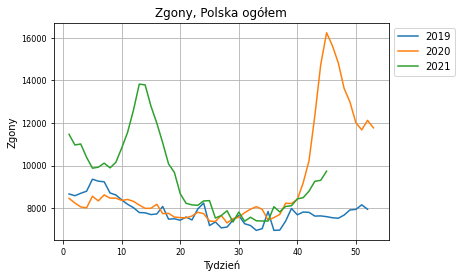

In [46]:
# %load_ext autoreload
# %autoreload

# from share.helper_functions import (
#     getfile, 
#     unzip, 
#     xlsx2xls, 
#     display_all,
#     set_legend_right,
#     plot
# )



plotopts = dict_of(
    plotdf=df_og, 
    cols_to_plot = [2019,2020,2021], 
    ylabel = 'Zgony',
    title = 'Zgony, Polska ogółem',
    fontsize = 8
    )

plot(**plotopts);

In [44]:
# df = mygus.all_years_df

# Q = '(`Wiek zmarłych w latach` == "Ogółem")  & (Podregiony == "Lubelskie")'
# dfl=dict()
# dfl["Lubelskie"] = (df
# .copy(deep=True))
# dfl["Lubelskie"].drop(['Wiek zmarłych w latach', 'NUTS', 'Podregiony' ], axis=1, inplace=True)
# dfl["Lubelskie"] = dfl["Lubelskie"].set_index('Rok').T.reset_index(drop=True)
# dfl["Lubelskie"].index.name = 'Tydzień'

# Q = '(`Wiek zmarłych w latach` == "Ogółem")  & (Podregiony == "Podlaskie")'

# dfl["Podlaskie"] = (df.query(Q).copy(deep=True))
# dfl["Podlaskie"].drop(['Wiek zmarłych w latach', 'NUTS', 'Podregiony' ], axis=1, inplace=True)
# dfl["Podlaskie"] = dfl["Podlaskie"].set_index('Rok').T.reset_index(drop=True)
# dfl["Podlaskie"].index.name = 'Tydzień'

# plotopts = dict_of(
#     plotdf=[dfl["Lubelskie"],dfl["Podlaskie"]], 
#     cols_to_plot = [2019,2020,2021], 
#     ylabel = 'Zgony',
#     title = 'Zgony, Lubelskie',
#     fontsize = 8
#     )

# plot(**plotopts);

In [15]:
mygus.all_years_df.query(Q)

,Rok,Wiek zmarłych w latach,NUTS,Podregiony,T01,T02,T03,T04,T05,T06,...,T44,T45,T46,T47,T48,T49,T50,T51,T52,T53
72,2000,Ogółem,PL81,Lubelskie,459,489,531,641,660,603,...,432,410,424,421,474,424,466,439,527,NaN
2032,2001,Ogółem,PL81,Lubelskie,485,474,401,543,456,480,...,437,422,470,442,476,404,441,528,523,NaN
3992,2002,Ogółem,PL81,Lubelskie,431,462,477,461,435,422,...,443,456,453,426,479,434,445,503,521,NaN
5952,2003,Ogółem,PL81,Lubelskie,510,471,453,455,439,474,...,455,425,415,422,468,406,418,414,450,NaN
7912,2004,Ogółem,PL81,Lubelskie,422,497,438,479,502,537,...,396,412,445,449,476,448,424,458,493,481
9872,2005,Ogółem,PL81,Lubelskie,489,442,491,469,476,495,...,447,419,405,455,454,454,447,472,502,NaN
11832,2006,Ogółem,PL81,Lubelskie,440,446,443,474,469,458,...,429,428,433,410,418,459,435,466,450,NaN
13792,2007,Ogółem,PL81,Lubelskie,417,502,423,463,436,516,...,467,485,432,431,441,452,444,445,480,NaN
15752,2008,Ogółem,PL81,Lubelskie,514,491,457,488,467,452,...,421,405,439,471,460,455,463,424,449,NaN
17712,2009,Ogółem,PL81,Lubelskie,494,494,526,551,559,631,...,450,494,485,447,419,419,421,497,573,508


/home/ochab/anaconda2/envs/python3.6/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


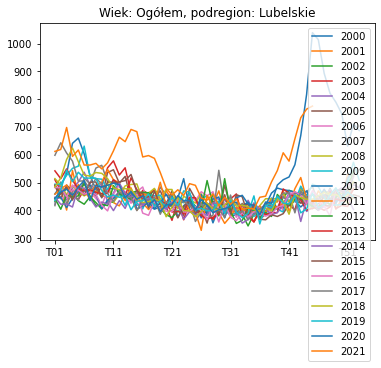

In [47]:
fig, ax = plt.subplots();
wiek = 'Ogółem'
podregion = 'Lubelskie'
title = f'Wiek: {wiek}, podregion: {podregion}'
Q = f'(`Wiek zmarłych w latach` == "{wiek}")  & (Podregiony == "{podregion}")'
df = mygus.all_years_df.query(Q)
ax = df.iloc[:, 4:].T.plot(ax=ax, title = title);
ax.legend(df['Rok'].to_list());
plt.show();

In [19]:
df.iloc[:, 0].to_list()

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]